In [1]:
import pandas as pd

In [2]:
#Leitura dos arquivos excel
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [3]:
#Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Retorna uma amostra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
24,Recife,2019-01-01,13.00,983,2
238,Natal,2019-01-03,139.64,1035,1
67,Salvador,2019-01-01,36.89,1037,2
4,Fortaleza,2019-01-01,14.25,1004,6
216,Natal,2019-01-02,5.82,1035,1


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [4]:
#Alterando o tipo de dados da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Retornando os valores nulos do df
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [5]:
#Substituindo os valores nulos pela média
#O parâmetro inplace faz a mudança em memória e não só no código
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [6]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
178,Salvador,2019-01-02,39.28,1037,3,117.84,3.0
47,Aracaju,2018-01-01,80.46,1520,2,160.92,2.0
117,Recife,2019-03-02,15.42,983,8,123.36,8.0
156,Salvador,2019-01-02,36.14,1037,3,108.42,3.0
224,Natal,2019-01-02,178.30,1035,3,534.90,3.0
13,Salvador,2019-02-12,39.29,1035,1,39.29,1.0
118,Recife,2019-03-02,17.70,981,5,88.50,5.0
10,Salvador,2019-01-01,30.97,1036,1,30.97,1.0
226,Natal,2019-01-02,38.32,1035,2,76.64,2.0
92,Aracaju,2018-01-01,37.46,1520,7,262.22,7.0


In [ ]:
df["Vendas"].mean()

122.61180089485458

In [7]:
#Apagando os valores nulos
df.dropna(inplace=True)

In [8]:
#Apagando as linhas com valores nulo com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**Criando colunas novas**

In [9]:
#Criando a coluna de receitas e atribuindo o valor da multiplicação da coluna Vendas com Qtde.
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [10]:
#Criando uma coluna caso não tenha o valor de Qtde
df["Receita/vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
df["Receita"].min()

3.34

In [ ]:
#nlargest - Retorna uma quantidade especifica dos maiores valores do df
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#nsmallest - Retorna uma quantidade especifica dos menores valores do df
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados
#ascending = false porque vai retornar do maior - menor
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# **Trabalhando com datas**

In [11]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/vendas           float64
dtype: object

In [12]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [13]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda
33,Recife,2019-01-01,32.33,982,1,32.33,1.0,2019
142,Salvador,2019-01-02,7.12,1034,1,7.12,1.0,2019
123,Aracaju,2018-01-01,115.19,1523,6,691.14,6.0,2018
196,Natal,2019-01-02,145.09,1036,2,290.18,2.0,2019
56,Aracaju,2018-01-01,41.90,1523,6,251.40,6.0,2018


In [14]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda,mes_venda,dia_venda
85,Aracaju,2018-01-01,15.17,1521,1,15.17,1.0,2018,1,1
64,Fortaleza,2019-01-01,110.31,1005,4,441.24,4.0,2019,1,1
230,Salvador,2019-01-03,184.69,1036,1,184.69,1.0,2019,1,3
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1
30,Fortaleza,2019-01-01,39.13,1005,6,234.78,6.0,2019,1,1


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [15]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
82,Aracaju,2018-01-01,150.48,1522,4,601.92,4.0,2018,1,1,0 days
165,Salvador,2019-01-02,11.54,1037,1,11.54,1.0,2019,1,2,366 days
89,Salvador,2019-01-01,17.46,1034,1,17.46,1.0,2019,1,1,365 days
160,Natal,2019-01-02,11.76,1034,1,11.76,1.0,2019,1,2,366 days
61,Salvador,2019-01-01,4.54,1036,3,13.62,3.0,2019,1,1,365 days


In [16]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
111,Aracaju,2018-01-01,24.25,1523,1,24.25,1.0,2018,1,1,0 days,1
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0,2018,1,1,0 days,1
49,Fortaleza,2019-01-01,183.33,1002,6,1099.98,6.0,2019,1,1,365 days,1
70,Aracaju,2018-01-01,8.44,1523,9,75.96,9.0,2018,1,1,0 days,1
50,Fortaleza,2019-01-01,33.69,1005,3,101.07,3.0,2019,1,1,365 days,1


In [17]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
109,Salvador,2019-03-02,124.37,1035,1,124.37,1.0,2019,3,2,425 days,1
116,Salvador,2019-03-02,41.78,1034,3,125.34,3.0,2019,3,2,425 days,1
118,Recife,2019-03-02,17.70,981,5,88.50,5.0,2019,3,2,425 days,1
75,Natal,2019-03-30,706.00,854,2,1412.00,2.0,2019,3,30,453 days,1
128,Recife,2019-03-02,38.70,982,4,154.80,4.0,2019,3,2,425 days,1
117,Recife,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1
50,Natal,2019-03-08,324.00,854,4,1296.00,4.0,2019,3,8,431 days,1
82,Natal,2019-03-07,868.00,854,3,2604.00,3.0,2019,3,7,430 days,1
132,Fortaleza,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days,1
125,Salvador,2019-03-02,25.00,1037,2,50.00,2.0,2019,3,2,425 days,1


# Visualização de dados

In [ ]:
#Contando quantas vendas foram feitas por loja
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

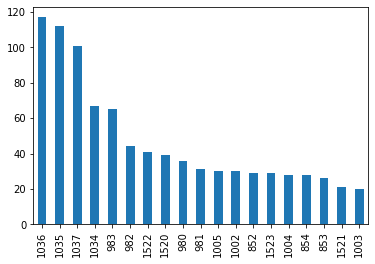

In [ ]:
#Criando um gráfico de barras para visualização
df["LojaID"].value_counts(ascending=False).plot.bar()

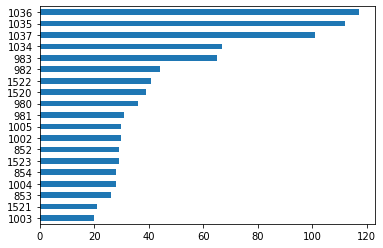

In [ ]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

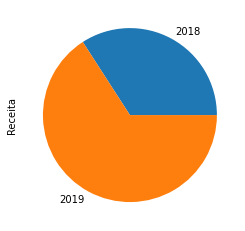

In [ ]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

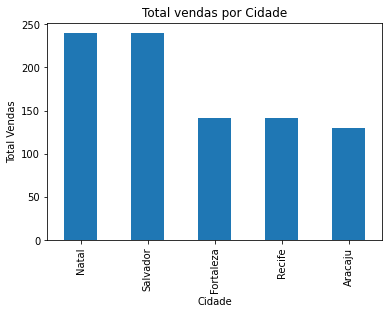

In [20]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

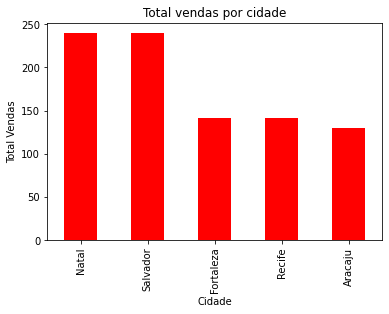

In [ ]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Alternando o estilo
plt.style.use("ggplot")

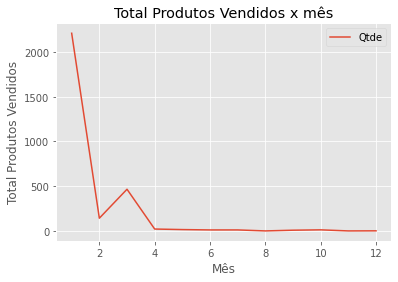

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total Produtos Vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [18]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

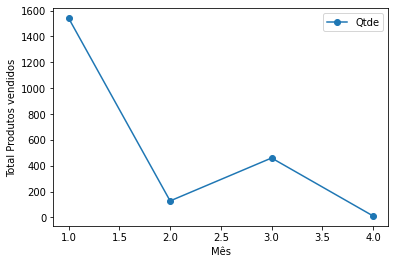

In [23]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês");
plt.ylabel("Total Produtos vendidos");
plt.legend();

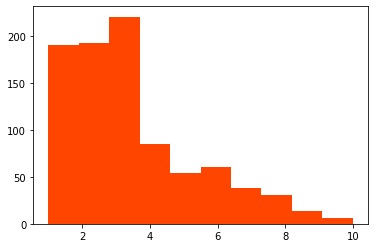

In [25]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

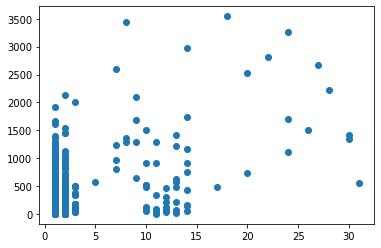

In [26]:
#Gráfico de disperção
plt.scatter(x=df_2019["dia_venda"], y= df_2019["Receita"]);

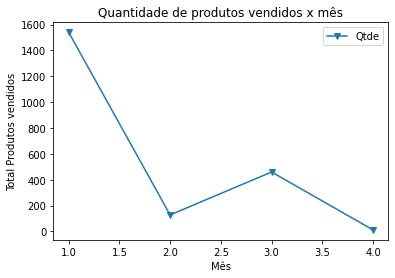

In [27]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos");
plt.legend()
plt.savefig("grafico QTDE e MES.png") #Salva a figura em png